Classification Project - Telco Co. Churn

In [29]:
# imports
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# import libraries
import numpy as np
from pydataset import data
import pandas as pd
# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
# import visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# import useful modules
import acquire
import prepare

Data Acquisition

In [30]:
# acquire TecoCo data
df = acquire.get_telco_data()
df

Let me get that for you...


,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Mailed check,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,2,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,Mailed check,DSL
7039,7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Electronic check,Fiber optic
7040,7040,1,2,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,Mailed check,DSL
7041,7041,1,2,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,Mailed check,DSL


In [31]:
#check data for any missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [32]:
# check for any missing values
print(df.isnull().sum())

Unnamed: 0                  0
internet_service_type_id    0
payment_type_id             0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
payment_type                0
internet_service_type       0
dtype: int64


Data Preparation

Dropped columns = ['Unnamed: 0', 'internet_service_type_id', 'payment_type_id', 'contract_type_id']. These columns held no intel value.

Created dummy columns of ['gender', 'payment_type', 'contract_type', 'internet_service_type']

- gender_Male = '0' is female, '1' is male
- payment_type = electronic check, mailed check, credit card( 0 is not automatic, 1 is automatic)
- contract_type = one year, two year
- internet_service_type = Fiber optic(0 is DSL, 1 is Fiber Optic), None

In [33]:
# prepare data telco data for modeling
telco_data = prepare.prep_telco(df)
# type of data in each column
telco_data


,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,gender_Male,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,0,Yes,Yes,9,Yes,No,No,Yes,No,...,593.3,0,0,0,0,1,1,0,0,0
1,0003-MKNFE,0,No,No,9,Yes,Yes,No,No,No,...,542.4,0,1,0,0,1,0,0,0,0
2,0004-TLHLJ,0,No,No,4,Yes,No,No,No,Yes,...,280.85,1,1,0,1,0,0,0,1,0
3,0011-IGKFF,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1237.85,1,1,0,1,0,0,0,1,0
4,0013-EXCHZ,1,Yes,No,3,Yes,No,No,No,No,...,267.4,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,No,No,13,Yes,No,Yes,No,No,...,742.9,0,0,0,0,1,1,0,0,0
7039,9992-RRAMN,0,Yes,No,22,Yes,Yes,No,No,No,...,1873.7,1,1,0,1,0,0,0,1,0
7040,9992-UJOEL,0,No,No,2,Yes,No,No,Yes,No,...,92.75,0,1,0,0,1,0,0,0,0
7041,9993-LHIEB,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,4627.65,0,1,0,0,1,0,1,0,0


Split the data into train, validate, test

In [34]:
# split telco data
train, validate, test = prepare.split_telco_churn(telco_data)
print(train.shape)
print(validate.shape)
print(test.shape)

(3943, 25)
(1691, 25)
(1409, 25)


Data Exploration

- determinme the drivers of churn
- visulize the data
- run statistical test
- create a baseline model

In [35]:
# Find the overall churn rate of the train dataset
# calculate the overall churn rate
train.churn.value_counts(normalize=True) 


0    0.73472
1    0.26528
Name: churn, dtype: float64

26.5% of people have churned where 73.5% of people have not churned.

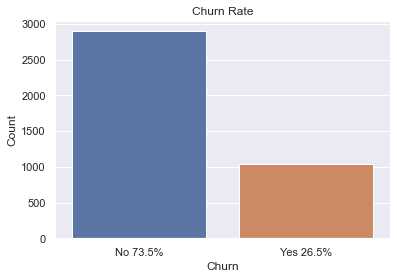

In [49]:
# visualize the churn rate
sns.set(style="darkgrid")
ax = sns.countplot(x='churn', data=train)
ax.set_title('Churn Rate')
ax.set_xlabel('Churn')
ax.set_ylabel('Count') 
ax.set_xticklabels(['No 73.5%', 'Yes 26.5%'])
plt.show()

In [41]:
# create a dataframe of those customers who churned
churn_customers = train[train.churn == 1]
# create a dataframe of those customers who did not churn
non_churn_customers = train[train.churn == 0]

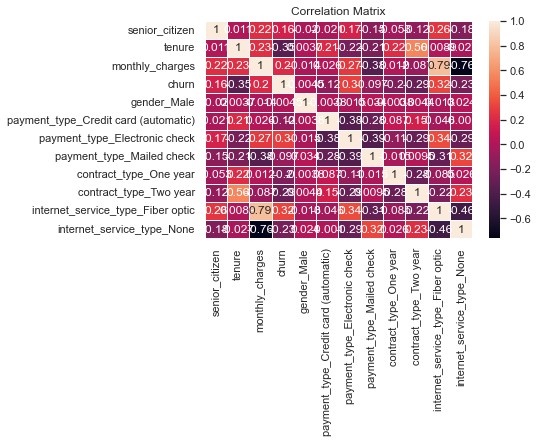

In [79]:
# create a correlation matrix of the telco data
corr_matrix = train.corr()
# plot the correlation matrix use masking to only show the variables that are correlated with churn
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), annot=True, linecolor='white', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

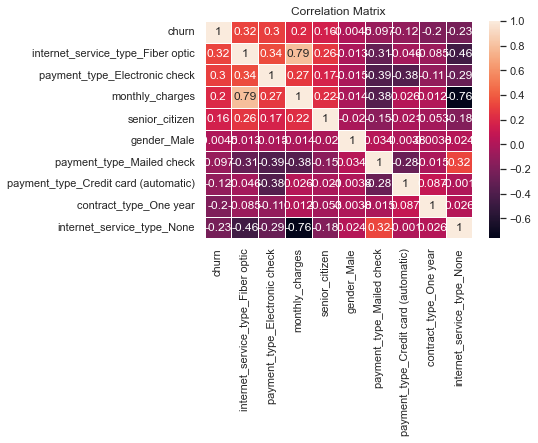

In [83]:
# what are the variables that correlate with churn the highest?
# create a list of the variables that correlate with churn the highest
corr_list = corr_matrix.nlargest(10, 'churn')['churn'].index
# create a dataframe of the variables that correlate with churn the highest
corr_df = train[corr_list]
# plot the correlation matrix using masking to only show the variables that are correlated with churn
sns.heatmap(corr_df.corr(), mask=np.zeros_like(corr_df.corr(), dtype=np.bool), annot=True, linecolor='white', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

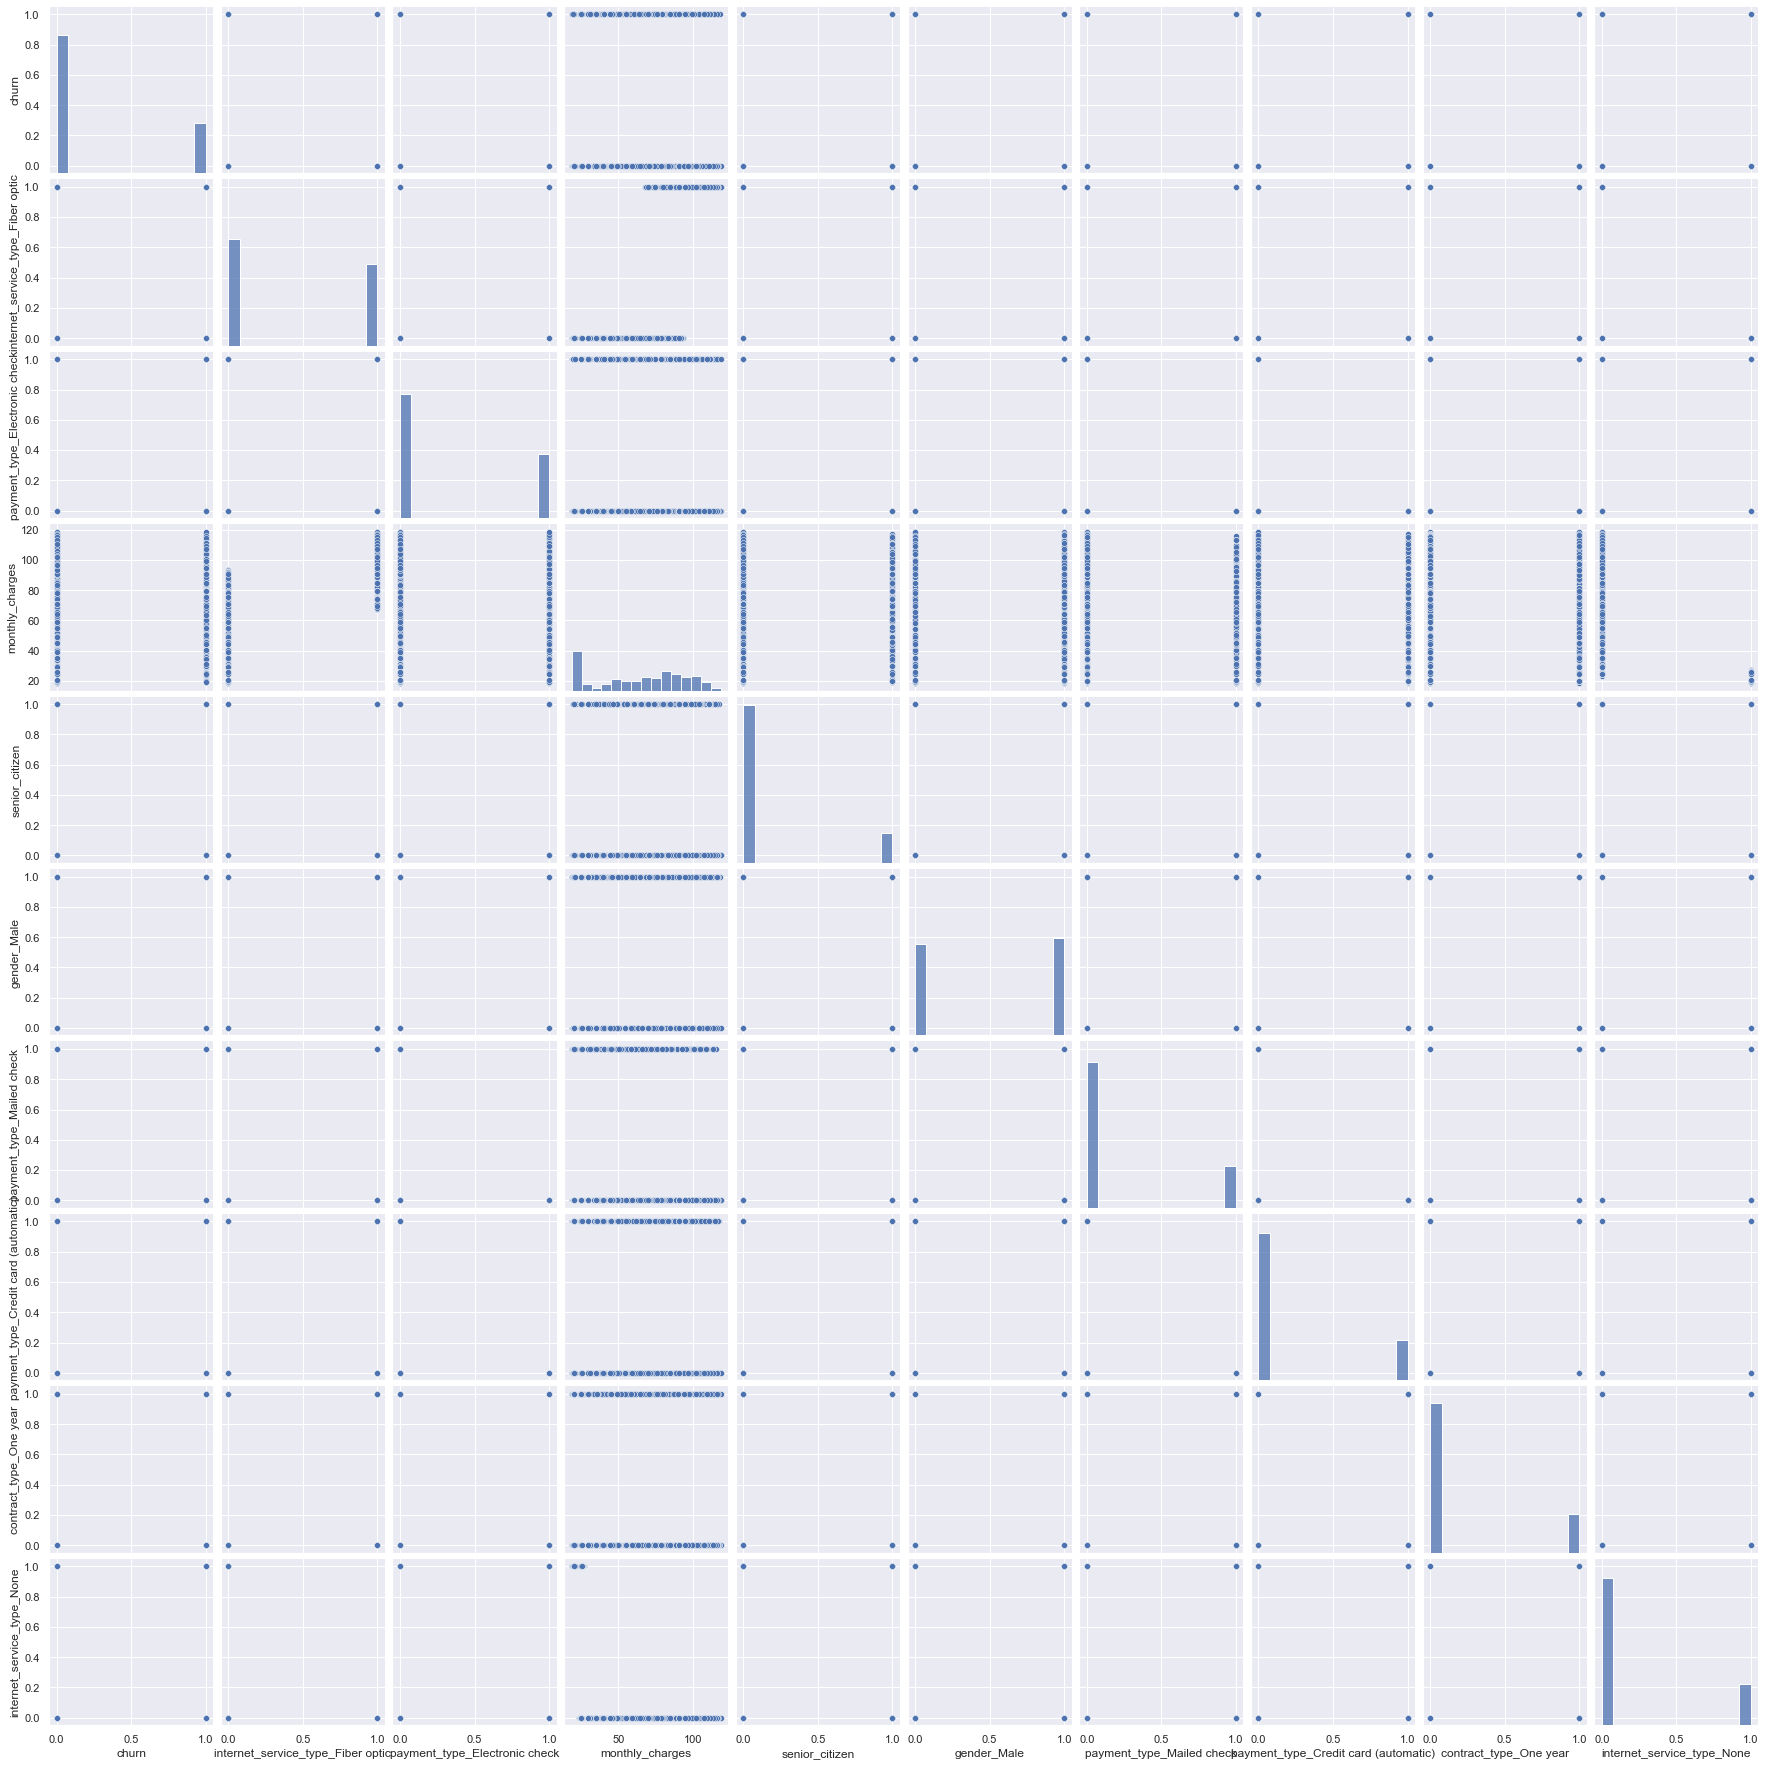

In [86]:
# create a plot of each variables that correlate with churn the highest
sns.pairplot(corr_df)
plt.show()

